<a href="https://colab.research.google.com/github/ChaosShadoww/MarketAnomaly/blob/main/MarketAnomalyDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

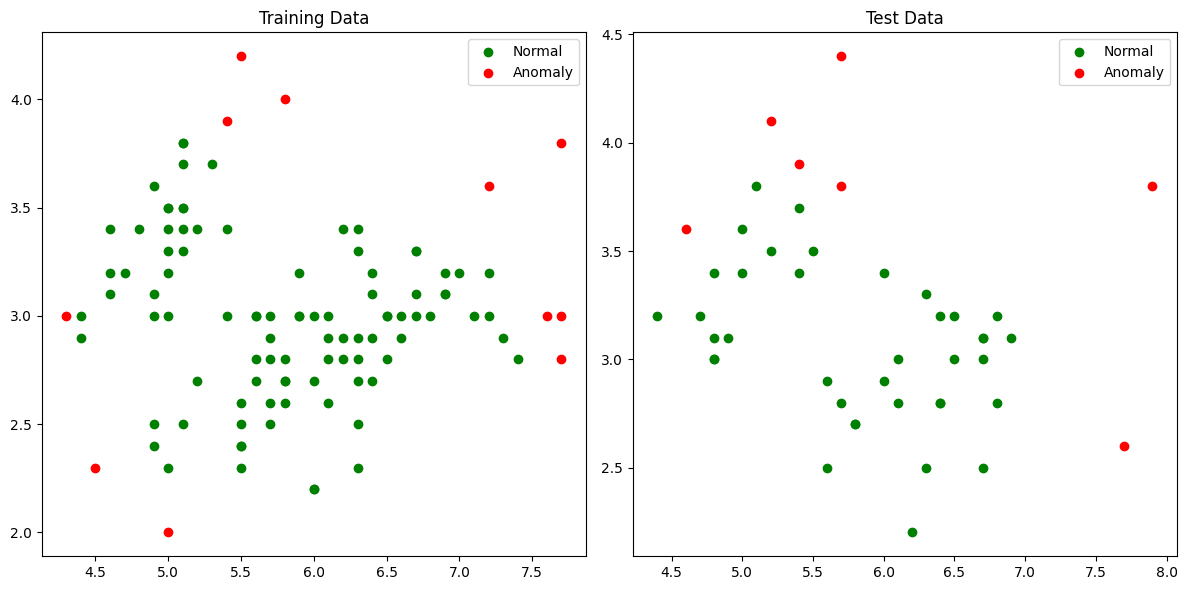


Welcome to the AI Investment Strategy Bot!
I can help explain the strategy and provide insights into the investment outcomes.
Type 'exit' to quit the conversation at any time.

Bot: I'm sorry, I didn't understand that. You can ask about the strategy, performance, average returns, investments, or anomalies.
Bot: I'm sorry, I didn't understand that. You can ask about the strategy, performance, average returns, investments, or anomalies.
Bot: Anomalies are considered risky points and are avoided in the investment strategy to minimize losses.


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Isolation Forest model
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(X_train)

# Predict anomalies in the data
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Simulate potential returns for investments
np.random.seed(42)
returns_train = np.random.uniform(-0.2, 0.2, size=len(y_pred_train))  # Simulated returns
returns_test = np.random.uniform(-0.2, 0.2, size=len(y_pred_test))  # Simulated returns

# Apply investment strategy: Invest only in "Normal" points (y_pred == 1)
invested_train = returns_train[y_pred_train == 1]
invested_test = returns_test[y_pred_test == 1]

# Calculate the performance of the strategy
total_train_return = invested_train.sum()
total_test_return = invested_test.sum()

# Create scatter plots
def create_scatter_plots(X1, y1, title1, X2, y2, title2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Scatter plot for the first set of data
    axes[0].scatter(X1[y1==1, 0], X1[y1==1, 1], color='green', label='Normal')
    axes[0].scatter(X1[y1==-1, 0], X1[y1==-1, 1], color='red', label='Anomaly')
    axes[0].set_title(title1)
    axes[0].legend()

    # Scatter plot for the second set of data
    axes[1].scatter(X2[y2==1, 0], X2[y2==1, 1], color='green', label='Normal')
    axes[1].scatter(X2[y2==-1, 0], X2[y2==-1, 1], color='red', label='Anomaly')
    axes[1].set_title(title2)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

create_scatter_plots(X_train, y_pred_train, 'Training Data', X_test, y_pred_test, 'Test Data')

#  bot for user interaction
def ai_bot():
    print("\nWelcome to the AI Investment Strategy Bot!")
    print("I can help explain the strategy and provide insights into the investment outcomes.")
    print("Type 'exit' to quit the conversation at any time.\n")

    while True:
        user_input = input("You: ").strip().lower()
        if user_input == "exit":
            print("Bot: Thank you for using the AI Investment Strategy Bot. Goodbye!")
            break
        elif "strategy" in user_input:
            print("Bot: The investment strategy identifies 'normal' data points as potential investments and avoids anomalies, minimizing risk.")
        elif "performance" in user_input:
            print(f"Bot: The total return from the training data is {total_train_return:.4f}, and from the test data, it is {total_test_return:.4f}.")
        elif "average return" in user_input:
            print(f"Bot: The average return for training data is {np.mean(invested_train):.4f}, and for test data, it is {np.mean(invested_test):.4f}.")
        elif "investments" in user_input:
            print(f"Bot: {len(invested_train)} investments were made in the training data, and {len(invested_test)} in the test data.")
        elif "anomalies" in user_input:
            print("Bot: Anomalies are considered risky points and are avoided in the investment strategy to minimize losses.")
        else:
            print("Bot: I'm sorry, I didn't understand that. You can ask about the strategy, performance, average returns, investments, or anomalies.")

# Run the bot
ai_bot()
